In [29]:
from control import *
import numpy as np
import matplotlib.pyplot as plt

In [30]:
kp = 31.28054740957967
ki = 44.965786901270775
kd = 947.2140762463343

In [31]:
plant = tf([1], [64,9.6,0.48,0.008])
pid = tf([kd,kp,ki], [1,0])

In [32]:
sys1 = feedback(pid*plant, 1)

In [33]:
sys1d = sys1.sample(Ts=0.025, method='zoh', alpha=None)
sys1d


0.004617 z^3 - 0.004618 z^2 - 0.004608 z + 0.004609
---------------------------------------------------
    z^4 - 3.987 z^3 + 5.97 z^2 - 3.98 z + 0.9963

dt = 0.025

In [34]:
time = np.arange(0,100)

<function matplotlib.pyplot.show>

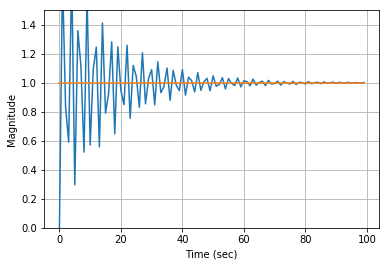

In [43]:
# PID compensated Step Response
t, z = step_response(sys1,T=time) # chage to sys1d to probe discrete domain
target = np.linspace(1, 1, num=len(t))
plt.figure()
# In continuos domain:
plt.plot(t,z,t,target)
# In discrete domain:
#plt.plot(z[0])
plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
C = [0, 4, 0, 0]
A = np.fft.fft(C)
B = np.fft.ifft(A)
A - B
B.real - C

array([0., 0., 0., 0.])

In [25]:
x = pd.read_excel('hello1.xlsx')

In [26]:
t = np.array((x['time']))

In [27]:
posW = np.array((x['output']))
pwmW = np.array((x['input']))

In [8]:
posSp = np.fft.fft(posW)
IposSp = np.fft.ifft(posSp)
posW - IposSp.real
posW

array([362.39, 363.22, 364.42, ..., 391.57, 393.12, 394.03])

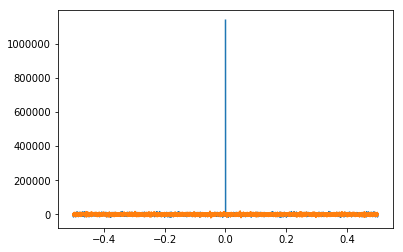

In [9]:
posSp = np.fft.fft(posW)
pwmSp = np.fft.fft(pwmW)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, pwmSp.real, freq, pwmSp.imag)
plt.show()

In [28]:
x['input'] = pwmW
x['output'] = posW

In [29]:
len(x)

8922

In [20]:
x

,time,output,input
0,0.025,362.39,27
1,0.050,363.22,0
2,0.075,364.42,26
3,0.100,365.86,207
4,0.125,367.33,172
5,0.150,368.77,18
6,0.175,369.94,50
7,0.200,370.74,190
8,0.225,370.99,203
9,0.250,370.63,222


In [30]:
#x = pd.read_excel('antihorario.xlsx')

#d = {'time': np.arange(10), 'pwm': np.arange(10), 'antihorapos': np.arange(10)}
#x = pd.DataFrame(data=d)

q1 = pd.DataFrame()
q1['input1'] = pd.Series(x['input'], index=x.index)
q1['y1'] = pd.Series(x['output'], index=x.index)
q1 = q1.shift(periods=-1, freq=None, axis=0)
#q1 = q1.drop(q1.index[0])

x['input1'] = pd.Series(q1['input1'], index=x.index)
x['y1'] = pd.Series(q1['y1'], index=x.index)

q2 = pd.DataFrame()
q2['input2'] = pd.Series(x['input'], index=x.index)
q2['y2'] = pd.Series(x['output'], index=x.index)
q2 = q2.shift(periods=-2, freq=None, axis=0)
#q2 = q2.drop(q2.index[0:2])

x['input2'] = pd.Series(q2['input2'], index=x.index)
x['y2'] = pd.Series(q2['y2'], index=x.index)

x = x.drop(x.index[8920:8922])

#y = x['antihorapos']
y = pd.DataFrame()
y['output'] = x['output']

x = x.drop('output', axis=1)
x = x.drop('time', axis=1)

In [31]:
x

,input,input1,y1,input2,y2
0,27,0.0,363.22,26.0,364.42
1,0,26.0,364.42,207.0,365.86
2,26,207.0,365.86,172.0,367.33
3,207,172.0,367.33,18.0,368.77
4,172,18.0,368.77,50.0,369.94
5,18,50.0,369.94,190.0,370.74
6,50,190.0,370.74,203.0,370.99
7,190,203.0,370.99,222.0,370.63
8,203,222.0,370.63,210.0,369.80
9,222,210.0,369.80,43.0,368.65


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [33]:
from sklearn.linear_model import Lasso
model = Lasso()

In [34]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
model.score(x_test,y_test)

0.9534655335910049

In [36]:
x_test

,input,input1,y1,input2,y2
6591,202,24.0,388.50,5.0,386.28
3689,235,74.0,385.03,82.0,382.90
3226,253,233.0,384.24,192.0,385.99
5319,147,90.0,384.96,6.0,382.83
2653,189,172.0,377.70,216.0,378.93
7828,9,167.0,380.23,137.0,381.49
3113,7,147.0,378.56,173.0,376.82
6718,39,55.0,389.33,139.0,391.08
4461,143,223.0,389.16,114.0,387.99
6399,189,147.0,381.84,106.0,380.81


In [37]:
predicted = model.predict(x_test)

In [38]:
predicted.shape

(3568,)

In [40]:
y_test;

([array([  8.,  41., 107., 159., 368., 745., 645., 628., 613., 254.]),
  array([ 13.,  56., 113., 150., 394., 734., 594., 578., 621., 315.])],
 array([360.86 , 364.226, 367.592, 370.958, 374.324, 377.69 , 381.056,
        384.422, 387.788, 391.154, 394.52 ]),
 <a list of 2 Lists of Patches objects>)

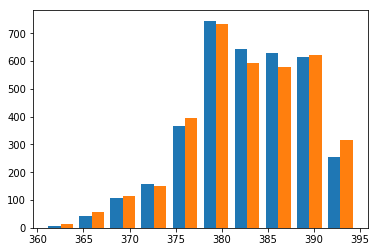

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test['output']])

In [43]:
residuals = y_test['output'] - predicted

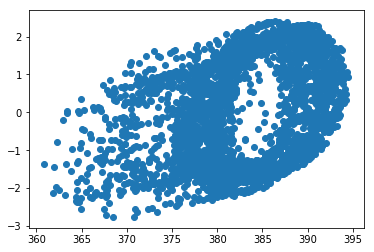

In [44]:
plt.scatter(y_test,residuals)

In [52]:
ap_residuals = np.abs(residuals) / y_test['output']
len(ap_residuals)

3568

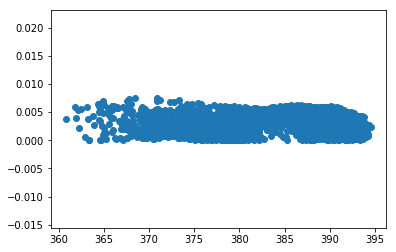

In [53]:
plt.scatter(y_test,ap_residuals)

In [54]:
lap_residuals = np.log(ap_residuals)

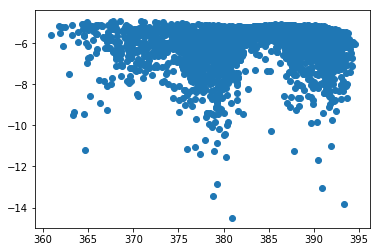

In [55]:
plt.scatter(y_test,lap_residuals)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


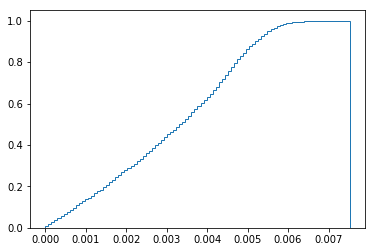

In [56]:
plt.hist(ap_residuals, bins=100, normed=1, histtype='step', cumulative=True);

In [4]:
np.fft.fft([0])

array([0.+0.j])

In [ ]:
def pidController(kp, ki, kd, dt, n, pid1, error0, error1, error2):
    q1 = kp + 0.5*dt*ki + (kd/dt)
    q2 = dt*ki*0.5 - kp - (2*kd/dt)
    q3 = kd/dt

    pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

    pid1 = pid0
    error1 = error0
    error2 = error1
    
    if (pid0 > 255):
        pid0 = 255
    elif (pid0 < 255):
        pid0 = -255
    else:
        pid0 = pid0
    
    d = {'pwm': [pid0], 'time': [dt * n]}
    
    
    return [d, pid0, pid1, error1, error2]

In [43]:
complex(1,2)

(1+2j)

In [147]:
def evaluatePID(kp, ki, kd, Ts, setPoint):
    #error = 0
    
    pid1 = 0
    pid2 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    
    E = []

    for k in np.arange(10000):
    #while error < 900000
        #d, pid0, pid1, error1, error2  = pidController(kp, ki, kd, 0.025, k, pid1, error0, error1, error2)
        
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < -255):
            pid0 = -255
        else:
            pid0 = pid0
        
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 1023):
            y = 1023
        elif (y < 30):
            y = 30
        else:
            y = y
            
        y1 = y
        y2 = y1
        
        error0 = setPoint - y
        E.append(pid0)

        print(pid0)
        #print([d, y, pid0, pid1, error1, error2])
    
    return E

In [148]:
kp = 0
ki = 0.9775171065493646
kd = 0
P = evaluatePID(kp, ki, kd, 0.1, 800)

0.0
37.63440860215054
112.90322580645163
186.84398534358132
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


In [144]:
#evaluatePID(kp, ki, kd, 1)

<function matplotlib.pyplot.show>

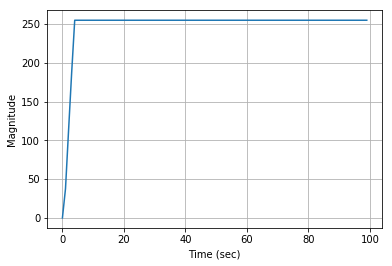

In [149]:
plt.figure()
plt.plot(P[0:100])
#plt.ylim([0,1.5])
plt.ylabel(r'Magnitude')
plt.xlabel(r'Time (sec)')
plt.grid()
plt.show

In [117]:
from deap import base, creator
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,))

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ControllerFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Controller' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [118]:
import random
from deap import tools

IND_SIZE = 30 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [128]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
    # =====================================================================================================
    pid1 = 0
    pid2 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    
    E = []

    setPoint = 800
    Ts = 0.1
    
    for k in np.arange(1000):      
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < 0):
            pid0 = 0
        else:
            pid0 = pid0
        
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 1023):
            y = 1023
        elif (y < 30):
            y = 30
        else:
            y = y
            
        y1 = y
        y2 = y1
        
        error0 = setPoint - y
        E.append(error0)
    
    total_error = sum(map(abs, E))
    
    print([total_error])
    
    return (total_error),

In [129]:
w = [1,2,3,-6]
w = sum(map(abs, w))
w

12

In [130]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [131]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 40

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)
    #while minFit > (0.02,):
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [132]:
kx = main()

[371217.70585746464]
[357075.33271211165]
[346799.9699229117]
[350634.2945231391]
[351040.8786614164]
[355097.13559631386]
[355689.4390119465]
[349276.0302103972]
[349882.5535599255]
[356914.4518973429]
[346984.22486680944]
[353407.5661807602]
[350908.86410839943]
[353617.25132271124]
[347758.79839625803]
[361056.15337549866]
[359382.9854134185]
[360827.7122123834]
[346165.54535131966]
[346240.1797315654]
[357679.13868348574]
[377214.230235953]
[373467.7173100099]
[366573.9048544144]
[372038.3000925016]
[347677.17866979976]
[496500]
[361506.3236726062]
[359408.46965400863]
[355414.2080814973]
[371611.3835503624]
[347689.3822824074]
[358037.6510574396]
[351077.46961631294]
[496500]
[350554.2151323466]
[357882.9823493561]
[496500]
[343391.6454587652]
[395364.9109941871]
[345080.73419986805]
[372314.3659857315]
[350814.95464064315]
[347357.1796453422]
[358966.6198993406]
[347677.17866979976]
[345031.0567474762]
[346345.8552223369]
[358372.9570676183]
[349291.4575559557]
[347589.8625239574

[308504.30893717596]
[291814.9733960922]
[292162.649946479]
[311435.147400316]
[317810.3235245743]
[298889.6900396197]
[313580.2537110213]
[317499.3381665501]
[344125.77754911047]
[312751.65359489707]
[306068.12842327874]
[313902.3892778921]
[311435.147400316]
[311435.147400316]
[311435.147400316]
[311435.147400316]
[314074.7321004219]
[314074.7321004219]
[303953.26927616855]
[310608.8565518497]
[292817.8325439679]
[292162.649946479]
[311435.147400316]
[280955.88933659653]
[311217.69896184246]
[310608.8565518497]
[343091.1295539005]
[311435.147400316]
[301562.4496509774]
=START=================================================================
[(308504.30893717596,), (291814.9733960922,), (292162.649946479,), (311435.147400316,), (317810.3235245743,), (298889.6900396197,), (313580.2537110213,), (317499.3381665501,), (344125.77754911047,), (312751.65359489707,), (306068.12842327874,), (313902.3892778921,), (311435.147400316,), (311435.147400316,), (311435.147400316,), (311435.147400316,),

[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[496500]
=START=================================================================
[(278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (405801.9169760129,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (496500,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (496500,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (496500,)]
=END===================================================================
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045

[239390.6745652425]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[281947.0004477053]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[294366.3048493796]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[239390.6745652425]
[278821.3471045703]
[278821.3471045703]
[239390.6745652425]
[306068.12842327874]
[278821.3471045703]
[278821.3471045703]
[239390.6745652425]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[278821.3471045703]
[233878.11155881808]
=START=================================================================
[(239390.6745652425,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (281947.0004477053,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (278821.3471045703,), (294366.3048493796,),

[233878.11155881808]
[233878.11155881808]
[345789.7256986676]
[357684.94389428204]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[332140.4607380963]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
[322643.59359907755]
[233878.11155881808]
[233878.11155881808]
[233878.11155881808]
=START=================================================================
[(233878.11155881808,), (233878.11155881808,), (345789.7256986676,), (357684.94389428204,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (332140.4607380963,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (233878.11155881808,), (322643.593

[349375.0142904265]
[223959.38211093884]
[287398.111558816]
[223959.38211093884]
[223959.38211093884]
[44206.002185070785]
[223959.38211093884]
[233649.73296961575]
[44206.002185070785]
[44206.002185070785]
[233878.11155881808]
[44206.002185070785]
[223959.38211093884]
[233649.73296961575]
[44206.002185070785]
[171254.94158996193]
[414072.4595383097]
[233649.73296961575]
[233878.11155881808]
[44206.002185070785]
[44206.002185070785]
[44206.002185070785]
[295509.53998398676]
[303259.1774178125]
[227435.88933659624]
[44206.002185070785]
[44206.002185070785]
=START=================================================================
[(349375.0142904265,), (223959.38211093884,), (287398.111558816,), (223959.38211093884,), (223959.38211093884,), (44206.002185070785,), (223959.38211093884,), (233649.73296961575,), (44206.002185070785,), (44206.002185070785,), (233878.11155881808,), (44206.002185070785,), (223959.38211093884,), (233649.73296961575,), (44206.002185070785,), (171254.94158996193,), 

[8408.330768410651]
[8408.330768410651]
[8408.330768410651]
[8408.330768410651]
[8408.330768410651]
[8408.330768410651]
=START=================================================================
[(8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (342219.8008472657,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (496500,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,), (8408.330768410651,)]
=END===================================================================
[8408.330768410651]
[8408.330768410651]
[8408.330768410651]
[840

In [133]:
for bits in kx:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])

[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[512, 5, 8, 500.4887585532747, 4.887585532746823, 7.820136852394917]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 512, 0, 0.0, 500.4887585532747, 0.0]
[4, 9, 0, 3.9100684261974585, 8.79765395894428, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
[0, 1, 0, 0.0, 0.9775171065493646, 0.

In [136]:
evaluate(kx[10])

[8408.330768410651]


(8408.330768410651,)

In [138]:
controller = ''.join(map(str,kx[10]))
    
# PID controller
_kp = int(controller[0:10],2)
_ki = int(controller[10:20],2)
_kd = int(controller[20:30],2)

kp = 0 + _kp * ( (1000 - 0) / (pow(2,10) - 1) )
ki = 0 + _ki * ( (1000 - 0) / (pow(2,10) - 1) )
kd = 0 + _kd * ( (1000 - 0) / (pow(2,10) - 1) )
    
print([_kp,_ki,_kd,kp,ki,kd])

[0, 1, 0, 0.0, 0.9775171065493646, 0.0]
